# Bellabeat Case Study

Charlestrong A. Bo

May 14, 2023

## Introduction

This is a walkthrough of the case study I worked on as a capstone project of the Google Data Analytics Professional Certificate. In this case study, I executed several practical tasks as a junior data analyst working for the marketing analyst team at Bellabeat, a high-tech company that develops items for women's health. This project was done using Python and Microsoft Excel as analytical tools. 

## About the company

[Bellabeat](https://bellabeat.com/) is a high-tech company that creates smart products having a focus on health. One of the founders utilized her background as an artist to create beautifully designed technology that educates and motivates women around the world. As an outcome of collecting data on activity, sleep, stress, and reproductive health, Bellabeat was able to provide women with
understanding of their own habits and health. 

Since its establishment in 2013, Bellabeat has expanded quickly and established itself as a tech-driven women's wellness company. Bellabeat had opened offices all around the world by 2016 and had introduced a number of products. In addition to their own e-commerce channel on [their website](https://bellabeat.com/), an increasing number of online retailers have started selling Bellabeat products.


## Business task

Urška Sršen, one of the founders, knows that analyzing the consumer data that Bellabeat has available might reveal greater room for advancement. In order get insight into how people are currently using their smart devices, she has requested the marketing analytics team focus on a Bellabeat product and examine smart device usage data. She would then like to use this information to get recommendations on how Bellabeat's marketing strategy can be driven by these trends.

The following questions will be used to guide the analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Data overview
Sršen encourages the team to make use of openly available data that investigates daily habits of smart device users. She directs them to the following data set:

● [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### Data Assessment (ROCCC)
* Reliability : LOW – Information was gathered from 30 participants. The size is quite small and some limitations are present. However, enough data is present to perform analysis and obtain some insights.
* Originality : LOW – Data was obtained from a third-party survey conducted by Amazon Mechanical Turk.
* Comprehensive : LOW – The datasets contain useful fields about the users' daily habits. However, more useful data might be needed for the business task.
* Current : LOW – The datasets are made way back in 2016 (7 years ago).
* Cited : MEDIUM – The sources of the data are cited.

### Selecting datasets
The 18 datasets went through an initial review and were opened in Microsoft Excel to know what kind of data are 
appropriate for the analysis in order to get the desired answers and insights.
    
Since the purpose of the analysis is to gain information about the smart device usage patterns of the participants,
it is suitable to only use these datasets:
    
* dailyActivity_merged.csv
* dailyCalories_merged.csv
* dailyIntensities_merged.csv
* dailySteps_merged.csv
* hourlyIntensities_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv

### Importing the necessary libraries

In [1]:
import pandas as pd                   # for data manipulation and analysis
import numpy as np                    # for processing arrays and mathematical functions   
import plotly.graph_objects as go     # for data visualizations
import matplotlib.pyplot as plt       # for data visualizations
import scipy.stats as stats           # for statistical computations
import csv                            # for csv handling                                 
import datetime                       # for date and time formats     
import time                           # for handling time-related tasks
from pandasql import sqldf            # for running SQL queries
from datetime import datetime         # for date and time formats

import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

## Data cleaning
Based on further observation, it is found that the data in three of the datasets (dailyCalories_merged.csv, 
dailyIntensities_merged.csv and dailySteps_merged.csv) are already in the dailyActivity_merged.csv dataset. It 
is possible to only use dailyActivity_merged.csv to get insights regarding steps, intensities and calories instead
of using the three separate datasets mentioned.

However, before removing dailyCalories_merged.csv, dailyIntensities_merged.csv and dailySteps_merged.csv from the 
selected datasets, ensuring whether the number of observations and their values match the observations in 
dailyActivity_merged.csv is important to confirm that these observations are already contained within it.

### Comparing datasets for possible removal
The number of rows for each dataset are checked first. In addition, the data type of the values stored in the activity date columns will be changed to a proper datetime datatype for more accurate analysis. This is due to the formatting inconsistencies found in the said columns when the datasets were opened in Microsoft Excel during the initial review. 

In [2]:
# store the csv files into dataframes
activity_df = pd.read_csv('dailyActivity_merged.csv')
calories_df = pd.read_csv('dailyCalories_merged.csv')
intensities_df = pd.read_csv('dailyIntensities_merged.csv')
steps_df = pd.read_csv('dailySteps_merged.csv')

# convert date columns into proper formats and data type
activity_df['ActivityDate'] = pd.to_datetime(activity_df['ActivityDate']).dt.date
calories_df['ActivityDay'] = pd.to_datetime(calories_df['ActivityDay']).dt.date
intensities_df['ActivityDay'] = pd.to_datetime(intensities_df['ActivityDay']).dt.date
steps_df['ActivityDay'] = pd.to_datetime(steps_df['ActivityDay']).dt.date
    
print("Number of rows: \ndailyActivity_merged.csv:",len(activity_df. index),
        "\ndailyCalories_merged.csv:",len(calories_df. index),
        "\ndailydailyIntensities_merged.csv:",len(intensities_df. index),
        "\ndailydailySteps_merged.csv:",len(steps_df. index))

Number of rows: 
dailyActivity_merged.csv: 940 
dailyCalories_merged.csv: 940 
dailydailyIntensities_merged.csv: 940 
dailydailySteps_merged.csv: 940


The 4 datasets have the same number of rows. It has become more likely that they have the same data. The next step is to compare dailyCalories_merged.csv, dailyIntensities_merged.csv and dailySteps_merged.csv separately to the dailyActivity_merged.csv dataset.

When a csv file is compared to the dailyActivity_merged.csv dataset, a temporary dataframe is created to store the observations having the same values using sqldf package from the pandasql library. This package enables SQL syntax to be used to query the dataframes. In this process, the INTERSECT operator from SQL is used to identify and retrieve the observations that are the same between the two datasets being compared. For this operation to work properly, it is important to ensure that the data types and the number of columns of the datasets being compared are the same. If the number of entries stored in the temporary dataframes are equal to the number of rows in dailyActivity_merged.csv (940), then it can be concluded that the data are already contained within it.

In [3]:
# remove columns that are unnecessary for the comparison
activity_df1 = activity_df.drop(activity_df.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]], axis=1)

# round the values into two decimal places for uniformity and more accurate comparison
activity_df1 = activity_df1.round(decimals=2)

activity_df1.info()
query = "SELECT * FROM activity_df1 INTERSECT SELECT * FROM calories_df"
activity_calories_df = sqldf(query)
print(activity_calories_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            940 non-null    int64 
 1   ActivityDate  940 non-null    object
 2   Calories      940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
             Id ActivityDate  Calories
0    1503960366   2016-04-12      1985
1    1503960366   2016-04-13      1797
2    1503960366   2016-04-14      1776
3    1503960366   2016-04-15      1745
4    1503960366   2016-04-16      1863
..          ...          ...       ...
935  8877689391   2016-05-08      2847
936  8877689391   2016-05-09      3710
937  8877689391   2016-05-10      2832
938  8877689391   2016-05-11      3832
939  8877689391   2016-05-12      1849

[940 rows x 3 columns]


In [4]:
# remove columns that are unnecessary for the comparison
activity_df2_drop = activity_df.drop(activity_df.columns[[2, 3, 4, 5, 14]], axis=1)

# rearrange columns to match the arrangement of the columns of the dataframe being compared
activity_df2_rearrange = activity_df2_drop.reindex(activity_df2_drop.columns[[0, 1, 9, 8, 7, 6, 5, 4, 3, 2]], axis=1)

# round the values into two decimal places for uniformity and more accurate comparison
activity_df2_rearrange = activity_df2_rearrange.round(decimals=2)
intensities_df = intensities_df.round(decimals=2)

activity_df2_rearrange.info()
query = "SELECT * FROM activity_df2_rearrange INTERSECT SELECT * FROM intensities_df"
activity_intensities_df = sqldf(query)
print(activity_intensities_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB
             Id ActivityDate  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   2016-04-12               728                   328   
1    1503960366   2016-04-13

In [5]:
# remove columns that are unnecessary for the comparison
activity_df3 = activity_df.drop(activity_df.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis=1)

# round the values into two decimal places for uniformity and more accurate comparison
activity_df3 = activity_df3.round(decimals=2)

activity_df3.info()
query = "SELECT * FROM activity_df3 INTERSECT SELECT * FROM steps_df"
activity_steps_df = sqldf(query)
print(activity_steps_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            940 non-null    int64 
 1   ActivityDate  940 non-null    object
 2   TotalSteps    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
             Id ActivityDate  TotalSteps
0    1503960366   2016-04-12       13162
1    1503960366   2016-04-13       10735
2    1503960366   2016-04-14       10460
3    1503960366   2016-04-15        9762
4    1503960366   2016-04-16       12669
..          ...          ...         ...
935  8877689391   2016-05-08       10686
936  8877689391   2016-05-09       20226
937  8877689391   2016-05-10       10733
938  8877689391   2016-05-11       21420
939  8877689391   2016-05-12        8064

[940 rows x 3 columns]


After confirming that the entries in the three separate datasets are already contained in dailyActivity_merged.csv and are the same, they can be removed from the selected datasets to be used for the analysis and only use dailyActivity_merged.csv for getting insights regarding steps, intensities and calories instead.

Both sleepDay_merged.csv and weightLogInfo_merged.csv datasets have formatting issues in the "SleepDay" and "Date" columns that are needed to be fixed. The time aspects are removed from the entries since only the dates are needed for the analysis and achieve uniformity throughout the selected datasets.

Finally, the "Fat" column in weightLogInfo_merged.csv has only two entries and the rest of the cells are empty. This column will be removed for that reason.

In [6]:
# store the csv files into dataframes
sleep_df = pd.read_csv('sleepDay_merged.csv')
weight_df = pd.read_csv('weightLogInfo_merged.csv')

# convert date columns into proper formats and data type
sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay']).dt.date
weight_df['Date'] = pd.to_datetime(weight_df['Date']).dt.date

# remove "Fat" column from the dataset
weight_df = weight_df.drop(['Fat'], axis=1)

sleep_df.info()
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dt

The selected datasets are now clean and ready for analysis.

## Data analysis

In order to understand the users' product usage, the number of times and how they use the products are need to be known. The number of users or unique IDs was identified on all datasets to know how many of the participants are using all the features of their devices.

### Summarizing the datasets

In [7]:
# create list for unique IDs in each dataset
daily_activity_users = activity_df.Id.unique().tolist()
sleep_users = sleep_df.Id.unique().tolist()
weight_users = weight_df.Id.unique().tolist()

print("Number of users: \nDaily activity:",len(daily_activity_users),
        "\nSleep:",len(sleep_users),
        "\nWeight:",len(weight_users,))


Number of users: 
Daily activity: 33 
Sleep: 24 
Weight: 8


It was found that there are 33 users who used the activity tracker feature of their devices. 24 users used the sleep tracker and 8 used the weight tracker. This can be further analyzed in order to know which users are using all the features and how often do they use them.

### Usage frequency

In [8]:
# find the number of users who use each feature and which features they use
daily_activity_only_users = 0
sleep_only_users = 0
weight_only_users = 0
daily_activity_sleep_weight_users = 0
daily_activity_sleep_users = 0
daily_activity_weight_users = 0
sleep_weight_users = 0

for x in range(len(daily_activity_users)): 
    if daily_activity_users[x] in sleep_users and daily_activity_users[x] in weight_users:
        daily_activity_sleep_weight_users = daily_activity_sleep_weight_users + 1
        daily_activity_sleep_users = daily_activity_sleep_users + 1
        daily_activity_weight_users = daily_activity_weight_users + 1
    elif daily_activity_users[x] in sleep_users and daily_activity_users[x]:
        daily_activity_sleep_users = daily_activity_sleep_users + 1
    elif daily_activity_users[x] in weight_users:
        daily_activity_weight_users = daily_activity_weight_users + 1 
    elif daily_activity_users[x] not in sleep_users and daily_activity_users[x] not in weight_users:
        daily_activity_only_users = daily_activity_only_users + 1
    
for x in range(len(sleep_users)): 
    if sleep_users[x] in weight_users and sleep_users[x] not in daily_activity_users:
        sleep_weight_users = sleep_weight_users + 1
    elif sleep_users[x] not in weight_users and sleep_users[x] not in daily_activity_users:
        sleep_only_users = sleep_only_users + 1
        
# create dataframe where the number of days each user used each feature is counted
activity_user_frequency_df = activity_df['Id'].value_counts().sort_index(ascending=True).rename_axis('Id').reset_index(name='counts')
sleep_user_frequency_df = sleep_df['Id'].value_counts().sort_index(ascending=True).rename_axis('Id').reset_index(name='counts')
weight_user_frequency_df = weight_df['Id'].value_counts().sort_index(ascending=True).rename_axis('Id').reset_index(name='counts')

print("Users who use all features:",daily_activity_sleep_weight_users)
print("Users who use daily activity and sleep tracker only:",daily_activity_sleep_users)
print("Users who use daily activity and weight tracker only:",daily_activity_weight_users)
print("Users who use sleep and weight tracker only:",sleep_weight_users)
print("Users who use daily activity tracker only:",daily_activity_only_users)
print("Users who use sleep tracker only:",sleep_only_users)
print("Users who use weight tracker only:",weight_only_users)


Users who use all features: 6
Users who use daily activity and sleep tracker only: 24
Users who use daily activity and weight tracker only: 8
Users who use sleep and weight tracker only: 0
Users who use daily activity tracker only: 7
Users who use sleep tracker only: 0
Users who use weight tracker only: 0


- All users (100%) used the daily activity tracker feature.
- More than half (73%) of the users used the sleep tracker feature.
- Only (24%) used the weight tracker feature.
- Out of 33 users, 6 (18%) of them used all the features of their devices. 
- 24 (73%) used both the daily activity and sleep tracker only.
- 8 (24%) users used both the daily activity and weight tracker only.
- 7 (21%) users used the daily activity tracker alone.
- There are no users who only used both sleep and weight tracker only.
- There are no users who used sleep tracker alone or weight tracker alone.

Three groups were formed for tracking the way the users use each feature of their devices: "Daily Activity", "Sleep" and "Weight". Each group consists of 4 classifications based on how many times a user recorded an entry for that feature:
* "No record" - No records were made.
* "Low" - The user made less than 10 days worth of records.
* "Medium" - The user made 11-20 days worth of records.
* "High" - The user made more than 21 days worth of records.

These usage recording frequencies were recorded into a dataframe and was summarized. An alluvial diagram was used to visualize the findings from this dataframe.

In [9]:
# create a dataframe where each feature is labeled their classifications based on how often each user use them
all_features_frequency_df = pd.DataFrame(columns = ['Id', 'DailyActivityUsage', 'SleepUsage', 'WeightUsage'])

# function to label how often each user use the daily activity tracker using the classifications assigned
def Daily_Activity_Usage(Id):
    feature_usage = "No record"
    if Id in activity_user_frequency_df['Id'].values:
        if activity_user_frequency_df.loc[activity_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 21:
            feature_usage = "High"
        elif activity_user_frequency_df.loc[activity_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 10 and activity_user_frequency_df.loc[activity_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 21:
            feature_usage = "Medium"
        elif activity_user_frequency_df.loc[activity_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 0 and activity_user_frequency_df.loc[activity_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 10:
            feature_usage = "Low"
    else:
        feature_usage = "No record"
    return feature_usage

# function to label how often each user use the sleep tracker using the classifications assigned
def Sleep_Usage(Id):
    feature_usage = "No record"
    if Id in sleep_user_frequency_df['Id'].values:
        if sleep_user_frequency_df.loc[sleep_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 21:
            feature_usage = "High"
        elif sleep_user_frequency_df.loc[sleep_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 10 and sleep_user_frequency_df.loc[sleep_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 21:
            feature_usage = "Medium" 
        elif sleep_user_frequency_df.loc[sleep_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 0 and sleep_user_frequency_df.loc[sleep_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 10:
            feature_usage = "Low"
    else:
        feature_usage = "No record"
    return feature_usage

# function to label how often each user use the weight tracker using the classifications assigned
def Weight_Usage(Id):
    feature_usage = "No record"
    if Id in weight_user_frequency_df['Id'].values:
        if weight_user_frequency_df.loc[weight_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 21:
            feature_usage = "High"
        elif weight_user_frequency_df.loc[weight_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 10 and weight_user_frequency_df.loc[weight_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 21:
            feature_usage = "Medium"
        elif weight_user_frequency_df.loc[weight_user_frequency_df['Id'] == Id, 'counts'].iloc[0] > 0 and weight_user_frequency_df.loc[weight_user_frequency_df['Id'] == Id, 'counts'].iloc[0] < 10:
            feature_usage = "Low"
    else:
        feature_usage = "No record"
    return feature_usage

# function to add a row to the datframe created 
def Add_New_Row(all_features_frequency_df, Id, daily_activity_usage, sleep_usage, weight_usage):
    list = [Id, daily_activity_usage, sleep_usage, weight_usage]
    all_features_frequency_df.loc[len(all_features_frequency_df)] = list
    return all_features_frequency_df

for x in range(len(daily_activity_users)):  
    Add_New_Row(all_features_frequency_df, activity_user_frequency_df.loc[x]['Id'], Daily_Activity_Usage(activity_user_frequency_df.loc[x]['Id']),Sleep_Usage(activity_user_frequency_df.loc[x]['Id']),Weight_Usage(activity_user_frequency_df.loc[x]['Id']))    

# count how many users have no record, low, medium or high records on each feature
daily_activity_no_record = len(all_features_frequency_df[all_features_frequency_df.DailyActivityUsage == 'No record'])  #no records in daily activity dataset
daily_activity_low_record = len(all_features_frequency_df[all_features_frequency_df.DailyActivityUsage == 'Low']) #less than 10 daily records in daily activity dataset
daily_activity_medium_record = len(all_features_frequency_df[all_features_frequency_df.DailyActivityUsage == 'Medium']) #11-20 daily records in daily activity dataset
daily_activity_high_record = len(all_features_frequency_df[all_features_frequency_df.DailyActivityUsage == 'High']) #more than 21 daily records in daily activity dataset
sleep_no_record = len(all_features_frequency_df[all_features_frequency_df.SleepUsage == 'No record'])  #no records in sleep dataset
sleep_low_record = len(all_features_frequency_df[all_features_frequency_df.SleepUsage == 'Low']) #less than 10 daily records in sleep dataset
sleep_medium_record = len(all_features_frequency_df[all_features_frequency_df.SleepUsage == 'Medium']) #11-20 daily records in sleep dataset
sleep_high_record = len(all_features_frequency_df[all_features_frequency_df.SleepUsage == 'High']) #more than 21 daily records in sleep dataset
weight_no_record = len(all_features_frequency_df[all_features_frequency_df.WeightUsage == 'No record'])  #no records in weight dataset
weight_low_record = len(all_features_frequency_df[all_features_frequency_df.WeightUsage == 'Low']) #less than 10 daily records in weight dataset
weight_medium_record = len(all_features_frequency_df[all_features_frequency_df.WeightUsage == 'Medium']) #11-20 daily records in weight dataset
weight_high_record = len(all_features_frequency_df[all_features_frequency_df.WeightUsage == 'High']) #more than 21 daily records in weight dataset

print(all_features_frequency_df,"\n")

print("Daily Activity No record:",daily_activity_no_record)
print("Daily Activity Low record:",daily_activity_low_record)
print("Daily Activity Medium record:",daily_activity_medium_record)
print("Daily Activity High record:",daily_activity_high_record)
print("Daily Activity Total:", daily_activity_no_record + daily_activity_low_record + daily_activity_medium_record + daily_activity_high_record)

print("Sleep No record:",sleep_no_record)
print("Sleep Low record:",sleep_low_record)
print("Sleep Medium record:",sleep_medium_record)
print("Sleep High record:",sleep_high_record)
print("Sleep Total:", sleep_no_record + sleep_low_record + sleep_medium_record + sleep_high_record)

print("Weight No record:",weight_no_record)
print("Weight Low record:",weight_low_record)
print("Weight Medium record:",weight_medium_record)
print("Weight High record:",weight_high_record)
print("Weight Total:", weight_no_record + weight_low_record + weight_medium_record + weight_high_record)



            Id DailyActivityUsage SleepUsage WeightUsage
0   1503960366               High       High         Low
1   1624580081               High  No record   No record
2   1644430081               High        Low   No record
3   1844505072               High        Low   No record
4   1927972279               High        Low         Low
5   2022484408               High  No record   No record
6   2026352035               High       High   No record
7   2320127002               High        Low   No record
8   2347167796             Medium     Medium   No record
9   2873212765               High  No record         Low
10  3372868164             Medium  No record   No record
11  3977333714               High       High   No record
12  4020332650               High        Low   No record
13  4057192912                Low  No record   No record
14  4319703577               High       High         Low
15  4388161847               High       High   No record
16  4445114986               Hi

### Usage frequency visualization

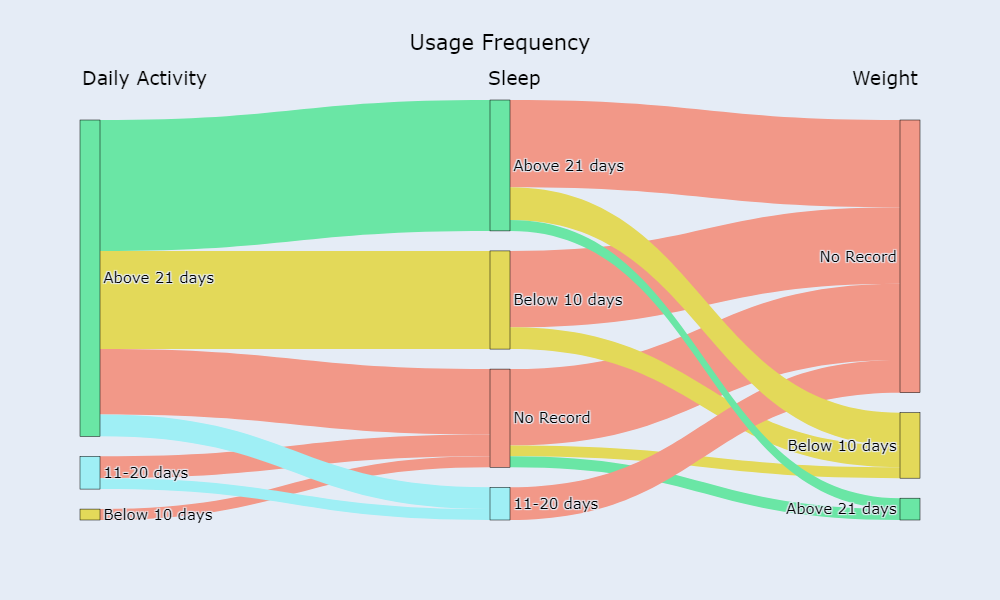

In [34]:
link_color = [
    '#f29888', '#f29888', '#abebd2', '#9feff5',
    '#f29888', '#e3d959', '#9feff5', '#6ae6a5',
    '#f29888', '#e3d959', '#6ae6a5', '#f29888',
    '#e3d959', '#f29888', '#f29888', '#e3d959', '#6ae6a5'
]

node_color = [
    '#e3d959', '#9feff5', '#6ae6a5', '#f29888',
    '#e3d959', '#9feff5', '#6ae6a5', '#f29888',
    '#e3d959', '#6ae6a5'
]

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node = dict(
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Below 10 days", "11-20 days", "Above 21 days", "No Record", "Below 10 days", 
               "11-20 days", "Above 21 days", "No Record", "Below 10 days", "Above 21 days"],
      color = node_color),
    link = dict(
      source = [0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 6, 6, 6],
      target = [3, 3, 4, 5, 3, 4, 5, 6, 7, 8, 9, 7, 8, 7, 7, 8, 9],
      value = [1, 2, 0, 1, 6, 9, 2, 12, 7, 1, 1, 7, 2, 3, 8, 3, 1],
      color = link_color)
    )])

for x_coordinate, column_name in enumerate(["Daily Activity","Sleep","Weight"]):
      fig.add_annotation(
          x=x_coordinate,
          y=1.085,
          xref="x",
          yref="paper",
          text=column_name,
          showarrow=False,
          font=dict(
              size=19,
              color="black"
              ),
          align="center")

fig.update_layout(title_text="Usage Frequency",barmode="overlay", title_x = 0.5,
                  xaxis={
                  'showgrid': False, # thin lines in the background
                  'zeroline': False, # thick line at x=0
                  'visible': False,  # numbers below
                  },
                  yaxis={
                  'showgrid': False, # thin lines in the background
                  'zeroline': False, # thick line at x=0
                  'visible': False,  # numbers below
                  },
                  font=dict(color="black"),
                  font_size=15,
                  paper_bgcolor = '#e5ecf6',
                  width=1000, height=600)

fig.show("png")

This figure shows that:
* Most users or 29 (88%) users used the daily activity tracker for more than 21 days. While 3 (9%) of them used it for at least 11-20 days and 1 (3%) used it for less than 10 days (4 days to be exact).  
* More than half of the users or 18 (56%) users tracked their sleep for less than 10 days. Half of them (9 users) did not track their sleep at all. 
* Only 8 (24%) users tracked their weight and 25 (76%) did not track their weight. 
* Only 1 (3%) user used all features for more than 21 days over the course of 31 days.

### Determining how many times users track their daily activities weekly
The date column in the dailyActivity_merged.csv dataset was converted to the day of the week and stored into a column. The number of times each day appeared was counted and a new dataframe was created based on this.

In [11]:
# remove columns that are unnecessary for the analysis
day_of_activity_df = activity_df.drop(activity_df.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis=1)

# convert the date column into the day of the week and store it into a new column
day_of_activity_df['ActivityDate'] = pd.to_datetime(day_of_activity_df['ActivityDate'])
day_of_activity_df['DayOfWeek'] = day_of_activity_df['ActivityDate'].dt.day_name()
day_of_activity_df = day_of_activity_df['DayOfWeek'].value_counts().rename_axis('DayOfWeek').reset_index(name='Counts')

# count how many times each day of the week occured in the "DayOfWeek" column and store the count value into a new column 
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_activity_df.DayOfWeek = pd.Categorical(day_of_activity_df.DayOfWeek,categories=weekdays)
day_of_activity_df = day_of_activity_df.sort_values('DayOfWeek')
day_of_activity_df = day_of_activity_df.reset_index(drop=True)
day_of_activity_df

,DayOfWeek,Counts
0,Monday,120
1,Tuesday,152
2,Wednesday,150
3,Thursday,147
4,Friday,126
5,Saturday,124
6,Sunday,121


A data visualization of this dataframe can be made using matplotlib. 

### Daily activity tracker records visualization

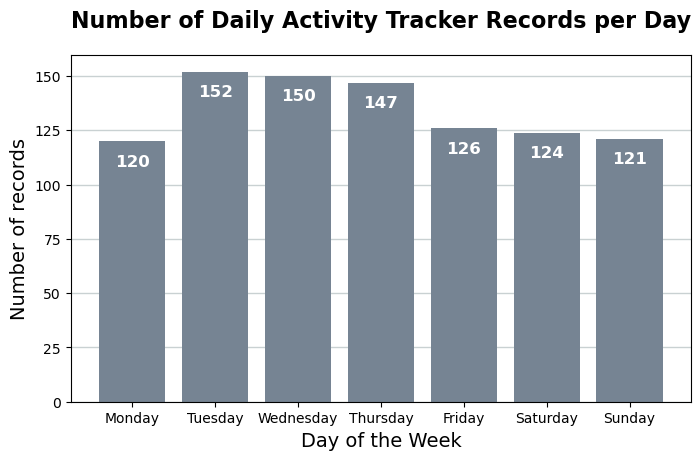

In [12]:
x = day_of_activity_df['DayOfWeek']
y = day_of_activity_df['Counts']
fig, ax = plt.subplots(figsize=(8,4.5))
ax.set_axisbelow(True)
bars = plt.bar(x, y,color = '#768493')
ax.bar_label(bars, padding=-20, color='white', fontsize=12, label_type='edge', fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of records', fontsize=14)
plt.yticks([ 0,25,50,75,100,125,150])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)
ax.set_title('Number of Daily Activity Tracker Records per Day', fontsize=16, fontweight='bold', pad=20)
plt.show()

The graph shows that at least 120 records are made daily across 33 users over the course of 31 days. Tuesday, Wednesday and Thursday have the most number of records with Tuesday being the highest (152 records). The records are particularly low from Saturday to Monday with Monday being the lowest (120).

### Determining the average intensities taken by the users throughout the day
To further understand how and how often the users use their devices, the average intensities achieved by the users throughout the day was also analyzed. This part of the analysis will use the hourlyIntensities_merged.csv dataset. The values in the ActivityHour column will be changed so that only the hour of the day part of the data will remain. The values in the "AverageIntensity" column will be grouped by their corresponding hour of the day and will be added together into a new column (AverageIntensities). 

In [13]:
# store the csv file into a dataframe
hourly_intensities_df = pd.read_csv('hourlyIntensities_merged.csv')

# extract the time value only from the "ActivityHour" column 
hourly_intensities_df['ActivityHour'] = pd.to_datetime(hourly_intensities_df['ActivityHour']).dt.time
hourly_intensities_df['ActivityHour'] = hourly_intensities_df['ActivityHour'].astype(str)

# create a list containing every hour of the day existing in the "ActivityHour" column
hour_list = hourly_intensities_df.ActivityHour.unique().tolist()

# count how many records are there for each hour
hourly_intensities_df2 = hourly_intensities_df['ActivityHour'].value_counts().rename_axis('ActivityHour').reset_index(name='RecordCount')

# create a list containing the sum of the values from the "AverageIntensity" column for each hour of the day
average_intensities_list = [] 
for x in range(len(hour_list)):
    average_intensities_list.append(hourly_intensities_df.loc[hourly_intensities_df['ActivityHour'] == hour_list[x], 'AverageIntensity'].sum())

# turn the list into a new column
hourly_intensities_df2['AverageIntensities'] = average_intensities_list
hourly_intensities_df2

,ActivityHour,RecordCount,AverageIntensities
0,00:00:00,934,33.150017
1,01:00:00,933,22.066689
2,02:00:00,933,16.233352
3,03:00:00,933,6.900019
4,04:00:00,932,9.833347
5,05:00:00,932,76.900020
6,06:00:00,931,120.583346
7,07:00:00,931,166.550006
8,08:00:00,931,227.600015
9,09:00:00,931,238.766669


### Average intensity per hour visualization

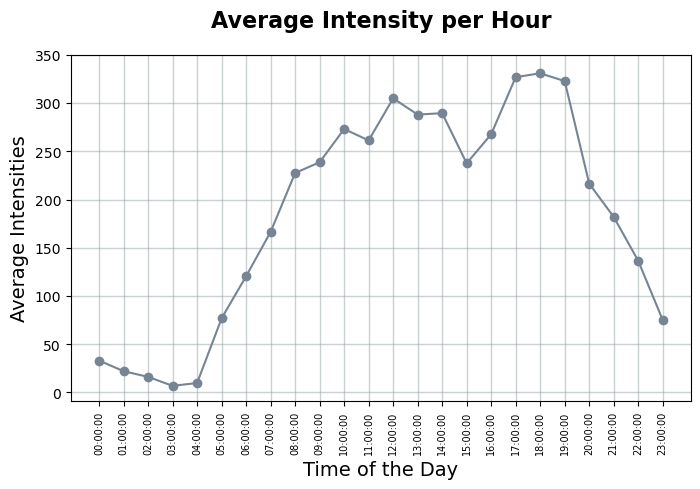

In [14]:
x = hourly_intensities_df2['ActivityHour']
y = hourly_intensities_df2['AverageIntensities']
fig, ax = plt.subplots(figsize=(8,4.5))
ax.set_axisbelow(True)
bars = plt.plot(x, y,color = '#768493',marker='o')
plt.xlabel('Time of the Day', fontsize=14)
plt.ylabel('Average Intensities', fontsize=14)
plt.yticks([ 0,50,100,150,200,250,300,350])
plt.xticks(rotation='vertical',fontsize=7)
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.5)
ax.set_title('Average Intensity per Hour', fontsize=16, fontweight='bold', pad=20)
plt.show()

This figure shows that most activities are recorded at 17:00 until 19:00 with 18:00 having the highest average intensities recorded (331.02) throughout the day. However, there are also some noticeable peaks like the ones from 12:00 to 14:00 having average intensities ranging from 288-304. Lastly, 10:00 having an average intensities of 273.18 makes it the hour having the highest average intensities recorded from early to late morning.

### Comparing users' active and sedentary minutes

Aside from knowing when the daily activities records are at their peaks, knowing how the users spend their time while the devices are recording their activities will also help bring more insights. 

The "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes" and "SedentaryMinutes" columns are used to know how long do the users use their devices daily. The total values of each column are added together and divided by the number of rows to get the daily average device usage.

In [15]:
# get the sum of each column
sedentary_total_minutes = activity_df['SedentaryMinutes'].sum()
lightly_active_total_minutes = activity_df['LightlyActiveMinutes'].sum()
fairly_active_total_minutes = activity_df['FairlyActiveMinutes'].sum()
very_active_total_minutes = activity_df['VeryActiveMinutes'].sum()

# add the sums together to get an overall total active minutes
active_total_minutes = sedentary_total_minutes + lightly_active_total_minutes + fairly_active_total_minutes + very_active_total_minutes

# get the average of every sum and round to whole number
average_total_minutes = round(active_total_minutes/940)
average_sedentary_minutes = round(sedentary_total_minutes/940)
average_lightly_minutes = round(lightly_active_total_minutes/940)
average_fairly_minutes = round(fairly_active_total_minutes/940)
average_very_minutes = round(very_active_total_minutes/940)

# function to convert minutes to hours
def minutes_to_hours(minutes_input):
    hours = minutes_input // 60
    minutes = minutes_input % 60
    if hours > 0:
        time_string = "{}h {}m".format(hours, minutes)
    else:
        time_string = "{}m".format(minutes)
    return time_string

# convert the average minute values to hours
average_total_hours = minutes_to_hours(average_total_minutes)
average_sedentary_hours = minutes_to_hours(average_sedentary_minutes)
average_lightly_hours = minutes_to_hours(average_lightly_minutes)
average_fairly_hours = minutes_to_hours(average_fairly_minutes)
average_very_hours = minutes_to_hours(average_very_minutes)

print("Average daily device usage:",average_total_hours)
print("Average sedentary duration:",average_sedentary_hours)
print("Average lightly active duration:",average_lightly_hours)
print("Average fairly active duration:",average_fairly_hours)
print("Average very active duration:",average_very_hours)

Average daily device usage: 20h 19m
Average sedentary duration: 16h 31m
Average lightly active duration: 3h 13m
Average fairly active duration: 14m
Average very active duration: 21m


### Daily activity intensities visualization

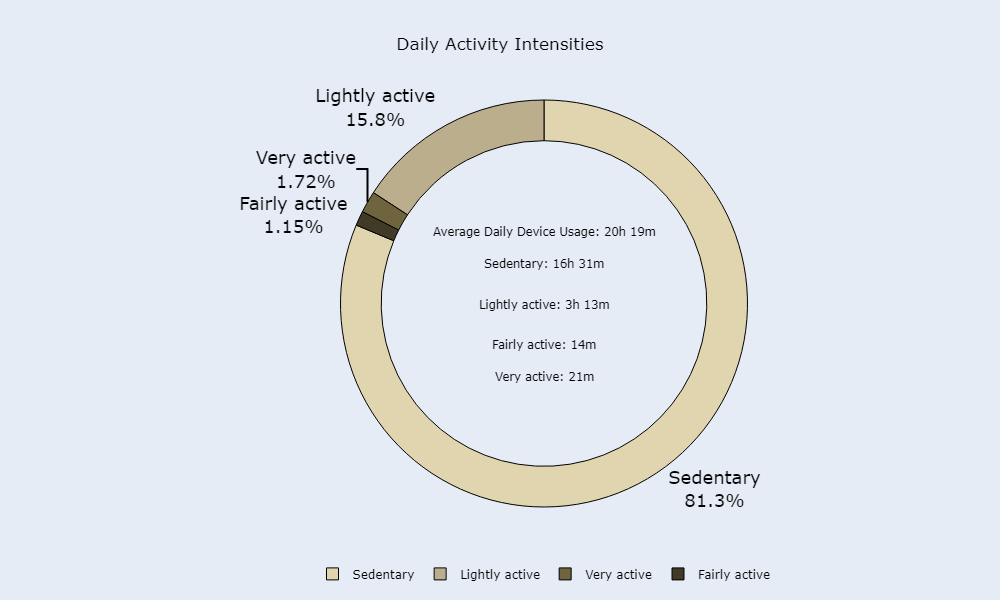

In [36]:
labels = ['Sedentary', 'Lightly active', 'Fairly active', 'Very active']
values = [average_sedentary_minutes, average_lightly_minutes, average_fairly_minutes, average_very_minutes]
colors = ['#e0d5af', '#baae8c', '#403a27', '#70643f']

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole = 0.8)])
fig.update_traces(hoverinfo='label+value+percent', textinfo='label + percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.update_layout(legend=dict(orientation = "h", yanchor = "bottom", y = -0.2, xanchor = "center", x = 0.5),
                  title_text = 'Daily Activity Intensities', title_x = 0.5, font=dict(color="black"), paper_bgcolor = '#e5ecf6', width=1000, height=600)

text_string_list = ["Average Daily Device Usage: "+average_total_hours, "Sedentary: "+average_sedentary_hours, 
                    "Lightly active: "+average_lightly_hours, "Fairly active: "+average_fairly_hours, "Very active: "+average_very_hours]
y_coordinate_list = [0.7, 0.6, 0.5, 0.4, 0.3]

def annotate_text(text_string_list,y_coordinate_list):
    for x in range(len(text_string_list)):
        fig.add_annotation(dict(x=0.5, y=y_coordinate_list[x],  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=11.5, 
                        font=dict(
                          color="black"
                        ),
                        text=text_string_list[x]))
        
annotate_text(text_string_list,y_coordinate_list)    

fig.show("png")

This chart illustrates the following:
* On average, the users use their device for 20 hours and 19 minutes daily.
* 81.3% (16 hours and 31 minutes) of the time the devices are being used, the users are being sedentary or inactive.
* 15.8% (3 hours and 13 minutes) of the time the devices are being used, the users are being lightly active.
* Only 1.72% (21 minutes) of the time the devices are being used, the users are being very active.
* Only 1.15% (14 minutes) of the time the devices are being used, the users are being fairly active.
    

### Determining the relationships between the calories burned and the users' activities

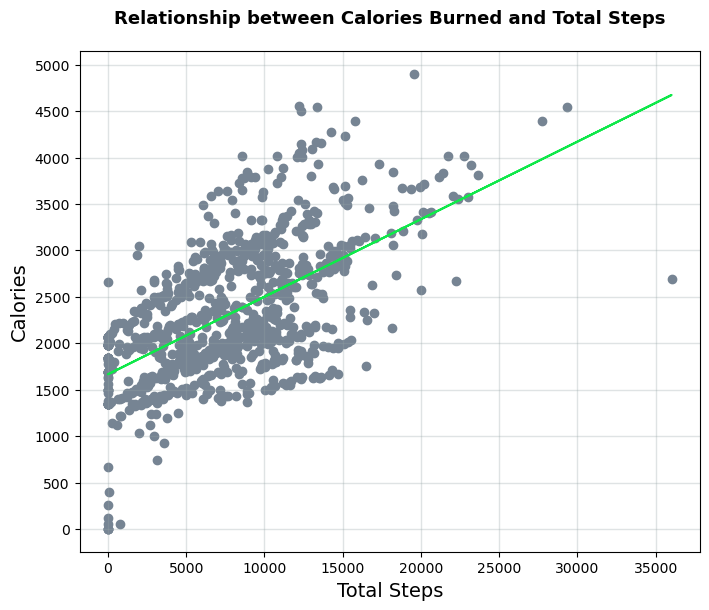

In [17]:
x = activity_df['TotalSteps']
y = activity_df['Calories']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots(figsize=(8,6.5))
plt.xlabel('Total Steps', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.yticks([ 0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.scatter(x, y,color = '#768493')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Relationship between Calories Burned and Total Steps', fontsize=13, fontweight='bold', pad=20)
plt.plot(x, m*x+b, color='#10e84a')
plt.show()

This figure shows a moderate positive association between the total steps taken by the users and the calories they burned. It means that the more steps they take, the more calories they burn.

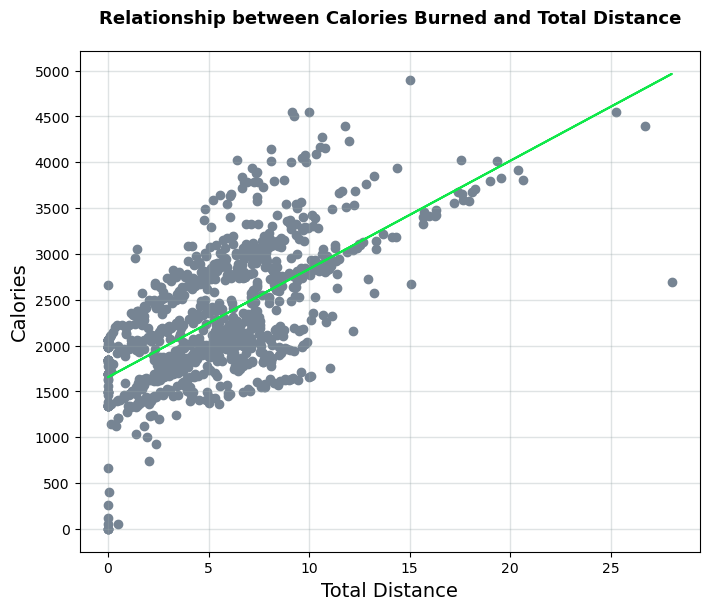

In [18]:
x = activity_df['TotalDistance']
y = activity_df['Calories']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots(figsize=(8,6.5))
plt.xlabel('Total Distance', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.yticks([ 0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.scatter(x, y,color = '#768493')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Relationship between Calories Burned and Total Distance', fontsize=13, fontweight='bold', pad=20)
plt.plot(x, m*x+b, color='#10e84a')
plt.show()

Similarly, there is a moderate positive association between the total distance achieved by the users and the calories they burned as shown in this figure. This means that the more distance they travel, the more calories they burn.

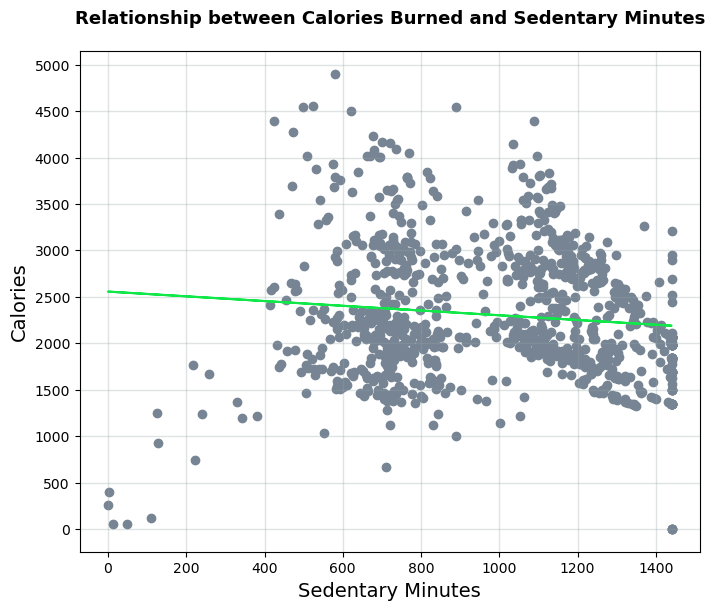

In [19]:
x = activity_df['SedentaryMinutes']
y = activity_df['Calories']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots(figsize=(8,6.5))
plt.xlabel('Sedentary Minutes', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.yticks([ 0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.scatter(x, y,color = '#768493')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Relationship between Calories Burned and Sedentary Minutes', fontsize=13, fontweight='bold', pad=20)
plt.plot(x, m*x+b, color='#10e84a')
plt.show()

The plot shows a negative association between the calories burned and sedentary minutes. Generally, the more the user is being sedentary, the less calories they burn.

### Determining the relationships between sleep and the users' activities

The sleepDay_merged.csv dataset will be used to know the relationship between the users' total minutes asleep and their activities. The dailyActivity_merged.csv dataset will be merged with the sleepDay_merged.csv dataset into a new dataframe using the "Id", "ActivityDate" and "SleepDay" columns. Only the users with records from both datasets will remain. The following columns will be used for the analysis:
* Id
* ActivityDate
* VeryActiveMinutes
* FairlyActiveMinutes
* LightlyActiveMinutes
* SedentaryMinutes
* TotalMinutesAsleep

A new column (TotalActiveMinutes) will be created with rows containing the sum of the values in the "VeryActiveMinutes" , "FairlyActiveMinutes" and "LightlyActiveMinutes" columns. 

In [20]:
# merge the datasets using the Id and date columns
acitivity_sleep_df = pd.merge(activity_df, sleep_df, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'], how='inner')

# remove columns that are unnecessary for the analysis
acitivity_sleep_df = acitivity_sleep_df.drop(acitivity_sleep_df.columns[[2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 18]], axis=1)

# create a new column containing the sum of the values from the active minutes columns
acitivity_sleep_df['TotalActiveMinutes'] = acitivity_sleep_df['VeryActiveMinutes'] + acitivity_sleep_df['FairlyActiveMinutes'] +acitivity_sleep_df['LightlyActiveMinutes']
acitivity_sleep_df

,Id,ActivityDate,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutesAsleep,TotalActiveMinutes
0,1503960366,2016-04-12,25,13,328,728,327,366
1,1503960366,2016-04-13,21,19,217,776,384,257
2,1503960366,2016-04-15,29,34,209,726,412,272
3,1503960366,2016-04-16,36,10,221,773,340,267
4,1503960366,2016-04-17,38,20,164,539,700,222
...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,10,20,301,749,343,331
409,8792009665,2016-05-01,0,0,79,834,503,79
410,8792009665,2016-05-02,0,0,101,916,415,101
411,8792009665,2016-05-03,0,0,156,739,516,156


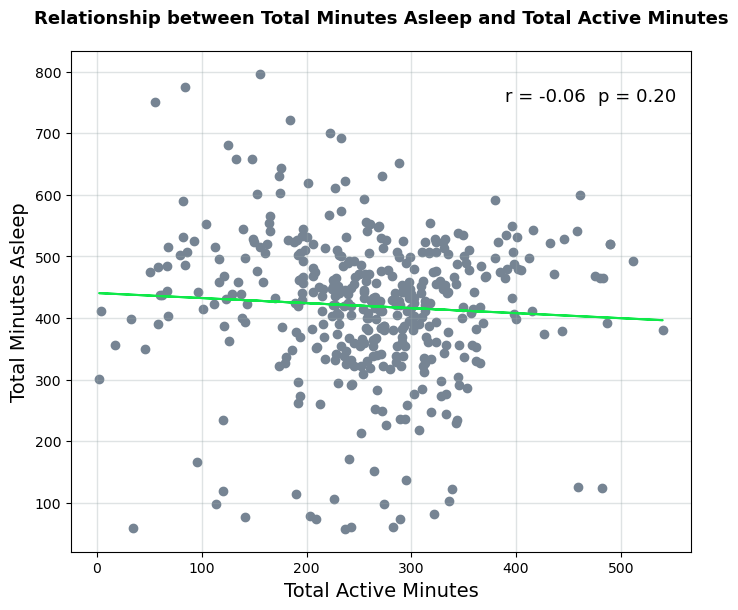

In [21]:
x = acitivity_sleep_df['TotalActiveMinutes']
y = acitivity_sleep_df['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots(figsize=(8,6.5))
plt.xlabel('Total Active Minutes', fontsize=14)
plt.ylabel('Total Minutes Asleep', fontsize=14)
plt.scatter(x, y,color = '#768493')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Relationship between Total Minutes Asleep and Total Active Minutes', fontsize=13, fontweight='bold', pad=20)
plt.plot(x, m*x+b, color='#10e84a')
r, p = stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=13)
plt.annotate('p = {:.2f}'.format(p), xy=(0.85, 0.9), xycoords='axes fraction', fontsize=13)
plt.show()

This plot show a very weak and statistically insignificant relationship between the total minutes asleep and total active minutes variables. 

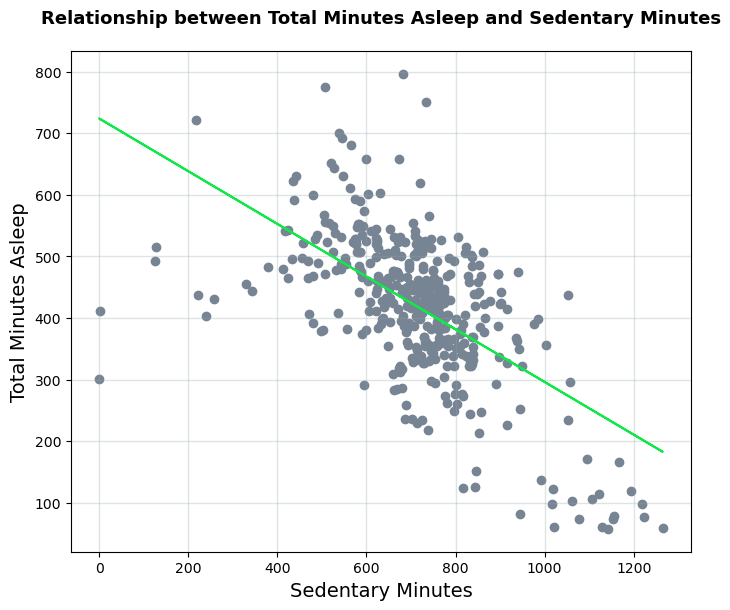

In [22]:
x = acitivity_sleep_df['SedentaryMinutes']
y = acitivity_sleep_df['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots(figsize=(8,6.5))
plt.xlabel('Sedentary Minutes', fontsize=14)
plt.ylabel('Total Minutes Asleep', fontsize=14)
plt.scatter(x, y,color = '#768493')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Relationship between Total Minutes Asleep and Sedentary Minutes', fontsize=13, fontweight='bold', pad=20)
plt.plot(x, m*x+b, color='#10e84a')
plt.show()

A moderate negative association between the total minutes asleep and sedentary minutes is shown in this figure. This means that the more a user is inactive or sedentary, the less sleep they get. 

## Data analysis summary

Key observations:

* Usage frequency
    * All users use the daily activity tracker feature.
    * More than half of the users use the sleep tracker feature.
    * The weight tracker feature is not often used.
    * Most recorded activities are on Tuesdays and records are low on Sunday and Monday.
* Daily activity intensity
    * On average, users are most active from 5:00PM to 7:00PM.
    * On average, users spend most of their time being sedentary or inactive.
* User activities and calories burned
    * Users with more total steps taken and total distance traveled burn more calories.
    * The more the users are being sedentary, the less calories they burn.
* User activities and sleep
    * The more the users are being inactive or sedentary, the less sleep they get.


## Recommendations

* Dataset: 
    * To understand the trends and see patterns even more, consider adding fields for more demographic data like:
        * Age (to better understand activity intensities, sleep patterns, etc.)
        * Gender (especially because Bellabeat’s target audience is women)
        * Employed or Student (to better understand day and time of use)
        * Subscribed to Bellabeat as a member or not (can be used for marketing strategy)
    * The total minutes asleep is not enough to tell the quality of sleep.
    * Use datasets with bigger sample size and up to date.
* Marketing and Bellabeat application:
    * Points/Experience and rewards system unlocked through membership
        * Users accumulate points or experience each time they manage to record progress for each feature. Points or experience           can be traded with rewards from Bellabeat. The more points or experience they trade, the better reward they get                 (discount, Bellabeat products, etc.).
        
    * Based on the findings from the usage frequency analysis, the weight tracker feature is not being used frequently. In           order to get users to use this feature more or at least three times a month (since weight does not generally change on a       daily basis), these strategies are suggested:
        - Consider implementing goals and rewards systems where users input their weight at the time they start using                     Bellabeat for their fitness goals and input a weight goal they want to achieve. Rewards are given if the weight goal           is achieved.
        - Alarms to notify the users that it is the time of the month to record their current weight.
        - Motivational messages or reminders each time the users record their weight, especially when they are progressing               towards their goal. 
        
    * Based on the findings from the usage frequency and daily activity intensity analysis, the users have certain days and           hours of the day when they record more often or perform activities more. The application can send the users notifications       telling them that it is time to warm up, hydrate, etc. based on their data. The app can even remind them that it is time       to turn off their devices to enable them to sleep early. This creates a more personalized feel towards the application.
    
    * Based on the findings from the user activities and calories burned and user activities and sleep analysis, the                 application can guide the users regarding their daily steps or distance goals based on their goals using the users' data.       The application can also notify the users when they are being sedentary, especially when the users' goal is to burn more       calories or sleep more.